In [1]:
# LIBRARIES

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_excel("DryBeanDataset/Dry_Bean_Dataset.xlsx")

PCA is affected by scale, so you need to scale the features in your data before applying PCA. 

Use **StandardScaler** to help you standardize the data set’s features onto unit scale (mean = 0 and variance = 1), which is a requirement for the optimal performance of many machine learning algorithms. 

If you don’t scale your data, it can have a negative effect on your algorithm. 

In [3]:
from sklearn.preprocessing import StandardScaler

# 16 features, 16 dimensions!
features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 
            'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2','ShapeFactor3', 'ShapeFactor4']
            
labels = ['Class']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,labels].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

After dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

## SVD

In [4]:
from sklearn.decomposition import PCA

# Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. 
# The input data is centered but not scaled for each feature before applying the SVD.

pca = PCA()

principalComponents = pca.fit_transform(x)

pca_df = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16'])

pca_df = pd.concat([pca_df, df[['Class']]], axis = 1)

## Explained variance

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important because while you can convert sixteen-dimensional space to a two-dimensional space, you lose some of the variance (information) when you do this.
By using the attribute **explained_variance_ratio_**, you can see that the first principal component contains 55.46% of the variance, and the second principal component contains 26.43% of the variance. Together, the two components contain 81.89% of the information.

In [5]:
print("\n".join("Variance of PC{}: {:0.6f}%".format(x, y) for x, y in zip(range(1,17), pca.explained_variance_ratio_*100)))
print("\n")
print("\n".join("Cumulative variance keeping at most {} PCA components: {:0.6f}%".format(x, y) for x, y in zip(range(1,17), np.cumsum(pca.explained_variance_ratio_*100))))


Variance of PC1: 55.466439%
Variance of PC2: 26.430973%
Variance of PC3: 8.006564%
Variance of PC4: 5.114080%
Variance of PC5: 2.739293%
Variance of PC6: 1.149761%
Variance of PC7: 0.697651%
Variance of PC8: 0.325082%
Variance of PC9: 0.051627%
Variance of PC10: 0.009087%
Variance of PC11: 0.006589%
Variance of PC12: 0.001837%
Variance of PC13: 0.000930%
Variance of PC14: 0.000063%
Variance of PC15: 0.000013%
Variance of PC16: 0.000011%


Cumulative variance keeping at most 1 PCA components: 55.466439%
Cumulative variance keeping at most 2 PCA components: 81.897412%
Cumulative variance keeping at most 3 PCA components: 89.903976%
Cumulative variance keeping at most 4 PCA components: 95.018056%
Cumulative variance keeping at most 5 PCA components: 97.757349%
Cumulative variance keeping at most 6 PCA components: 98.907110%
Cumulative variance keeping at most 7 PCA components: 99.604761%
Cumulative variance keeping at most 8 PCA components: 99.929843%
Cumulative variance keeping at most 9

<bound method Figure.tight_layout of <Figure size 2000x1000 with 4 Axes>>

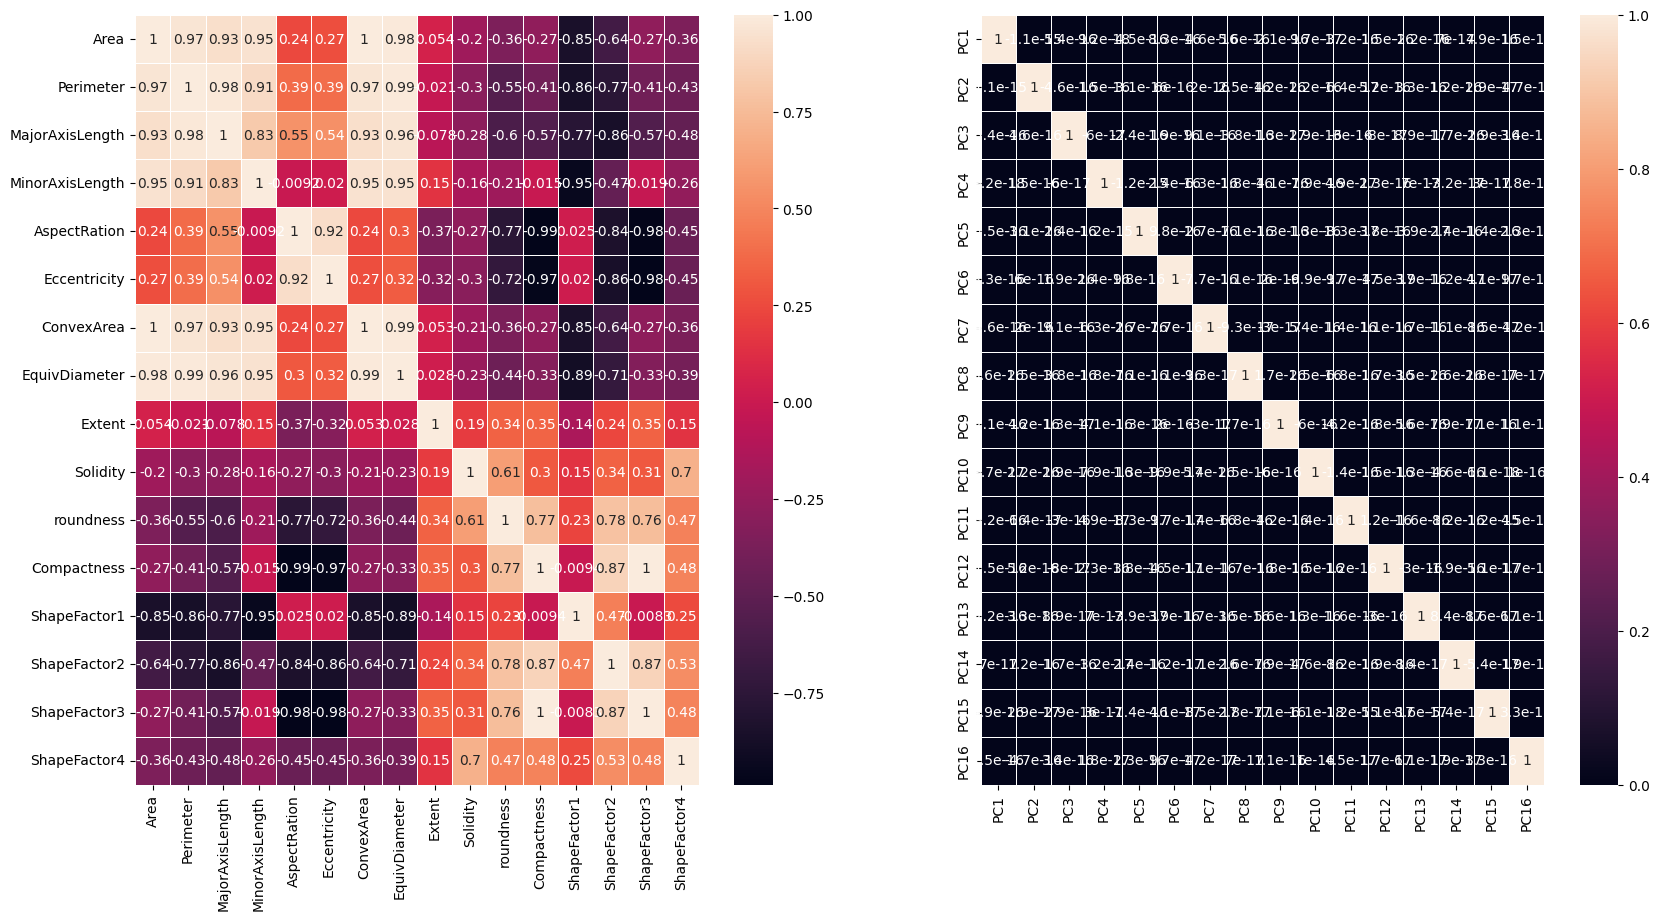

In [23]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=.5, ax=ax[0]);
sns.heatmap(pca_df.corr(numeric_only=True), annot=True, linewidths=.5, ax=ax[1]);
fig.tight_layout

## 2 components PCA

We keep the first 2 PCA components for the sake of data visualization.

In [7]:
from sklearn.decomposition import PCA

# Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. 
# The input data is centered but not scaled for each feature before applying the SVD.

pca = PCA(n_components = 2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

finalDf = pd.concat([principalDf, df[['Class']]], axis = 1)

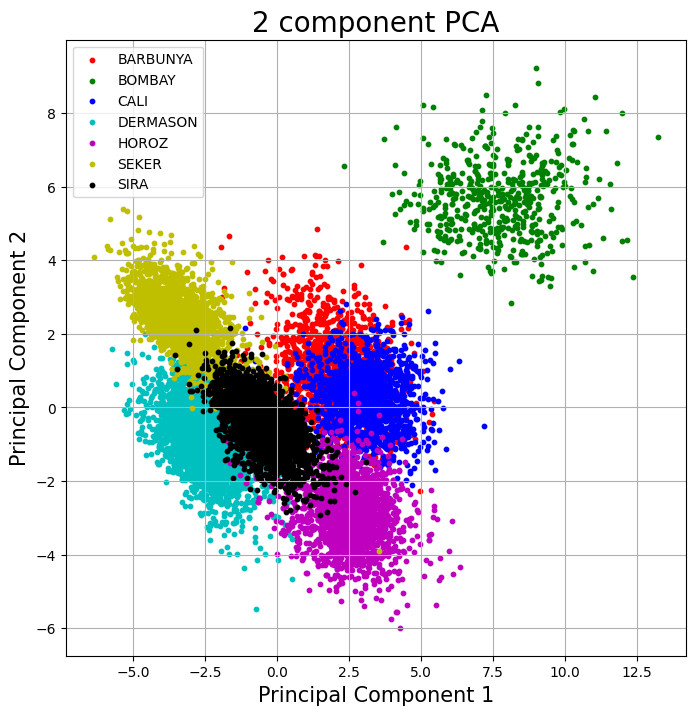

In [8]:
# DATA VISUALIZATION in 2D

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

labels = ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

for label, color in zip(labels,colors):
    indicesToKeep = finalDf['Class'] == label
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 10)

ax.legend(labels)
ax.grid()

## 3 components PCA

We keep the first 3 components for the sake of data visualization.

In [9]:
from sklearn.decomposition import PCA

# Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. 
# The input data is centered but not scaled for each feature before applying the SVD.

pca = PCA(n_components = 3)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3'])

finalDf = pd.concat([principalDf, df[['Class']]], axis = 1)

In [10]:
%matplotlib widget
# aka import ipymp

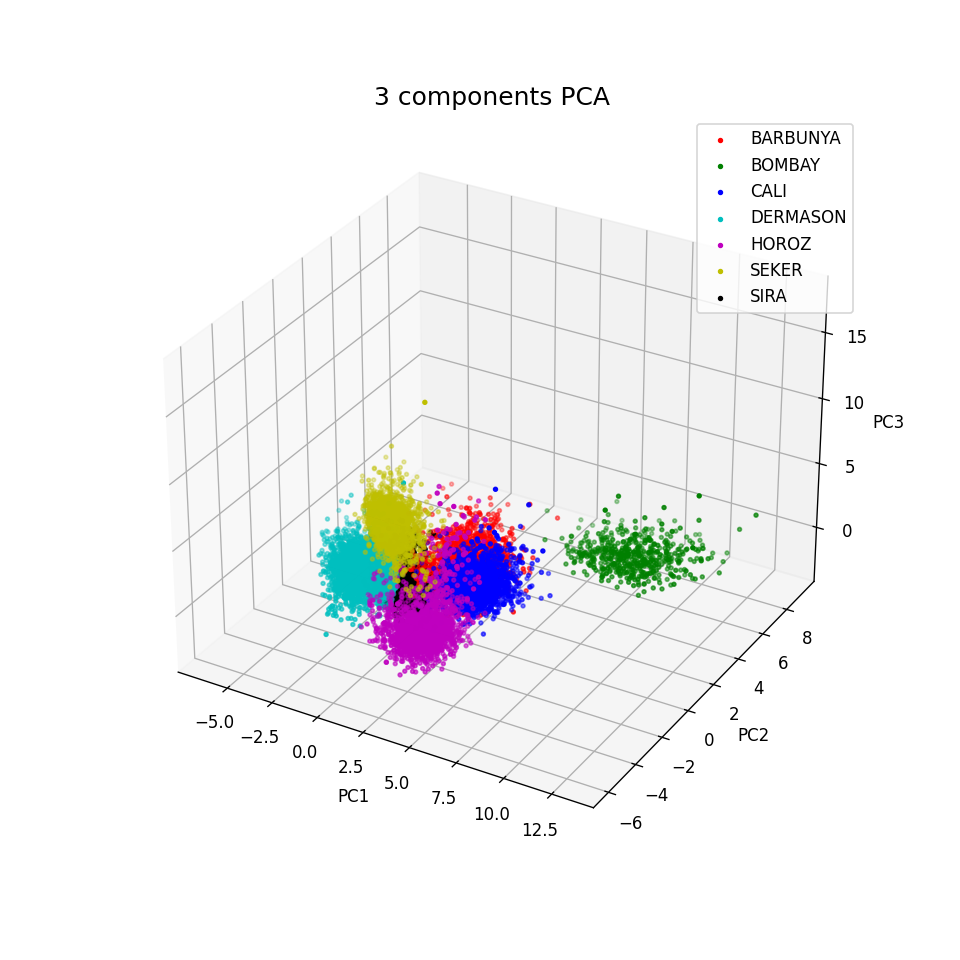

In [11]:
# DATA VISUALIZATION in 3D

fig = plt.figure(dpi=120, figsize=(8,8))
ax = fig.add_subplot(111, projection='3d') 
ax.set_xlabel('PC1', fontsize = 10)
ax.set_ylabel('PC2', fontsize = 10)
ax.set_zlabel('PC3', fontsize = 10)
# ax.set_tick(fontsize=5)
ax.set_title('3 components PCA', fontsize = 15)

labels = ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

for label, color in zip(labels,colors):
    indicesToKeep = finalDf['Class'] == label
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , finalDf.loc[indicesToKeep, 'PC3']
               , c = color
               , s = 5)

ax.legend(labels, fontsize = 10, loc=0)
ax.grid()